In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/major"

/content/drive/My Drive/major


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

In [0]:
import psutil
import humanize
import os
import GPUtil as GPU

# XXX: only one GPU on Colab and isn’t guaranteed


In [6]:
GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()



Gen RAM Free: 11.0 GB  | Proc size: 900.7 MB
GPU RAM Free: 14647MB | Used: 432MB | Util   3% | Total 15079MB


In [7]:
!pip install soundfile
!pip install librosa
!pip install imageio

In [8]:
from keras.layers import Conv2D,Reshape,MaxPooling2D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
#import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img,array_to_img,img_to_array
import pandas as pd

import gc
gc.collect()

Using TensorFlow backend.


0

In [23]:
import matplotlib.pyplot as plt
X = np.load('combined_feat.npy')
Y = pd.DataFrame({ 'label':np.load('mfcc_label.npy',allow_pickle = True)})
X.shape

(2133, 185)

In [0]:

Y = pd.get_dummies(Y.label).values

train_x,test_x,train_y,test_y =  train_test_split(X,Y,test_size = .1)

#del X
#del y
gc.collect()
Y.shape
num_classes=82

In [0]:
def Model():
    model = Sequential()    
    model.add(Conv1D(32, 4, activation='relu', input_shape=(185,1)))
    print(model.output_shape)
    model.add(Conv1D(32, 4, activation='relu'))
    print(model.output_shape)
    model.add(MaxPooling1D(4))
    print(model.output_shape)
    model.add(Conv1D(64, 4, activation='relu'))
    print(model.output_shape)
    model.add(Conv1D(64, 4, activation='relu'))
    print(model.output_shape)
    #model.add(GlobalAveragePooling1D())
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(512,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation = 'softmax'))
    
    optimizer = Adam(.001)
    
    model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(x=train_x.reshape(train_x.shape[0],train_x.shape[1],1),y=train_y,epochs = 100,batch_size = 16,validation_split = .1)#,callbacks = [tensorboard])
    
    result = model.evaluate(x = test_x.reshape(test_x.shape[0],test_x.shape[1],1),y = test_y)
    for name,value in zip(model.metrics_names,result):
        print('{0}: {1}'.format(name,value))
    
    
    return model,history


In [61]:
m,history = Model()

(None, 182, 32)
(None, 179, 32)
(None, 44, 32)
(None, 41, 64)
(None, 38, 64)
(None, 2432)
Train on 1727 samples, validate on 192 samples
Epoch 1/100
1727/1727 [==============================] - 2s 948us/step - loss: 3.2599 - acc: 0.3156 - val_loss: 1.7720 - val_acc: 0.6198
Epoch 2/100
1727/1727 [==============================] - 1s 345us/step - loss: 1.6883 - acc: 0.6138 - val_loss: 1.0220 - val_acc: 0.7760
Epoch 3/100
1727/1727 [==============================] - 1s 332us/step - loss: 0.9191 - acc: 0.7759 - val_loss: 0.6459 - val_acc: 0.8646
Epoch 4/100
1727/1727 [==============================] - 1s 336us/step - loss: 0.6549 - acc: 0.8489 - val_loss: 0.4385 - val_acc: 0.8854
Epoch 5/100
1727/1727 [==============================] - 1s 333us/step - loss: 0.4094 - acc: 0.8894 - val_loss: 0.3900 - val_acc: 0.8750
Epoch 6/100
1727/1727 [==============================] - 1s 337us/step - loss: 0.3048 - acc: 0.9195 - val_loss: 0.3239 - val_acc: 0.9323
Epoch 7/100
1727/1727 [==================

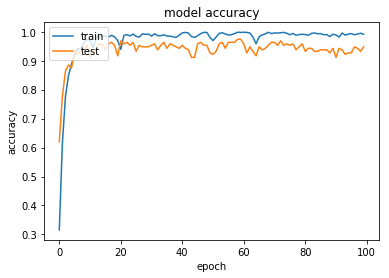

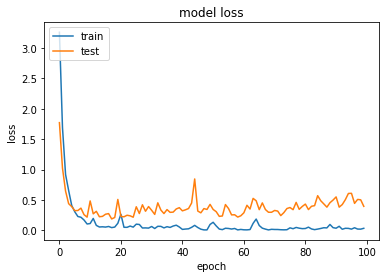

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [63]:
m.summary()

del train_x
del train_y
del test_x
del test_y


del history
del m
gc.collect()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 182, 32)           160       
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 179, 32)           4128      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 44, 32)            0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 41, 64)            8256      
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 38, 64)            16448     
_________________________________________________________________
flatten_8 (Flatten)          (None, 2432)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1245696   
__________

5411